In [23]:
from os import listdir
from pandas import read_csv
import pandas as pd
import numpy as np
import glob
import random
from pandas import DataFrame
from matplotlib import pyplot
from numpy import vstack
from numpy import unique

In [4]:
# load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

# load a group of files, such as x, y, z data for a given variable and  return them as a 3d numpy array
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = np.dstack(loaded)
    return loaded

# load a dataset type, such as train or test
def load_dataset(type, prefix=''):
    path = prefix + type + '/Inertial Signals/'
    
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_' + type + '.txt', 'total_acc_y_' + type + '.txt', 'total_acc_z_' + type + '.txt']
    # body acceleration
    filenames += ['body_acc_x_' + type + '.txt', 'body_acc_y_' + type + '.txt', 'body_acc_z_' + type + '.txt']
    # body gyroscope
    filenames += ['body_gyro_x_' + type + '.txt', 'body_gyro_y_' + type + '.txt', 'body_gyro_z_' + type + '.txt']

    # load input data
    X = load_group(filenames, path)
    # load output data
    y = load_file(prefix + type + '/y_'+type+'.txt')
    return X, y

In [5]:
# summarize the balance of classes in an output variable column
def class_breakdown(data):
    # convert the numpy array into a dataframe
    df = DataFrame(data)
    # group data by the class value and calculate the number of rows
    counts = df.groupby(0).size()
    # retrieve raw rows
    counts = counts.values
    # summarize
    for i in range(len(counts)):
        percent = counts[i] / len(df) * 100
        print('Class=%d, total=%d, percentage=%.3f' % (i+1, counts[i], percent))

In [6]:
# load all train data
trainX, trainy = load_dataset('train', 'UCI HAR Dataset/')
class_breakdown(trainy)
# load all test data
testX, testy = load_dataset('test', 'UCI HAR Dataset/')
class_breakdown(testy)

print('Both')
combined = vstack((trainy, testy))
class_breakdown(combined)

Class=1, total=1226, percentage=16.676
Class=2, total=1073, percentage=14.595
Class=3, total=986, percentage=13.411
Class=4, total=1286, percentage=17.492
Class=5, total=1374, percentage=18.689
Class=6, total=1407, percentage=19.138
Class=1, total=496, percentage=16.831
Class=2, total=471, percentage=15.982
Class=3, total=420, percentage=14.252
Class=4, total=491, percentage=16.661
Class=5, total=532, percentage=18.052
Class=6, total=537, percentage=18.222
Both
Class=1, total=1722, percentage=16.720
Class=2, total=1544, percentage=14.992
Class=3, total=1406, percentage=13.652
Class=4, total=1777, percentage=17.254
Class=5, total=1906, percentage=18.507
Class=6, total=1944, percentage=18.876


In [7]:
# load data
trainX, trainy = load_dataset('train', 'UCI HAR Dataset/')

sub_map = load_file('UCI HAR Dataset/train/subject_train.txt')
train_subjects = unique(sub_map)
print(train_subjects)

[ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]


In [8]:
# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
    # get row indexes for the subject id
    ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
    # return the selected samples
    return X[ix, :, :], y[ix]

In [9]:
# convert a series of windows to a 1D list
def to_series(windows):
    series = list()
    for window in windows:
        # remove the overlap from the window
        half = int(len(window) / 2) - 1
        for value in window[-half:]:
            series.append(value)
    return series

In [52]:
def plot_subject(X, y, person):
    pyplot.figure()
    n, off = X.shape[2] + 1, 0
    pyplot.suptitle('Person ' + str(person), y = 0.93)

    # total acceleration
    for i in range(3):
        pyplot.subplot(n, 1, off + 1)
        pyplot.plot(to_series(X[:, :, off]))
        pyplot.title('total acc ' + str(i), y = 0, loc = 'left')
        off += 1
    
    # body acceleration
    for i in range(3):
        pyplot.subplot(n, 1, off + 1)
        pyplot.plot(to_series(X[:, :, off]))
        pyplot.title('body acc ' + str(i), y = 0, loc = 'left')
        off += 1
    
    # body gyro
    for i in range(3):
        pyplot.subplot(n, 1, off + 1)
        pyplot.plot(to_series(X[:, :, off]))
        pyplot.title('body gyro ' + str(i), y = 0, loc = 'left')
        off += 1
    
    pyplot.subplot(n, 1, n)
    pyplot.plot(y)
    pyplot.title('activity', y=0, loc='left')
    pyplot.show()

[ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]
(360, 128, 9) (360, 1)


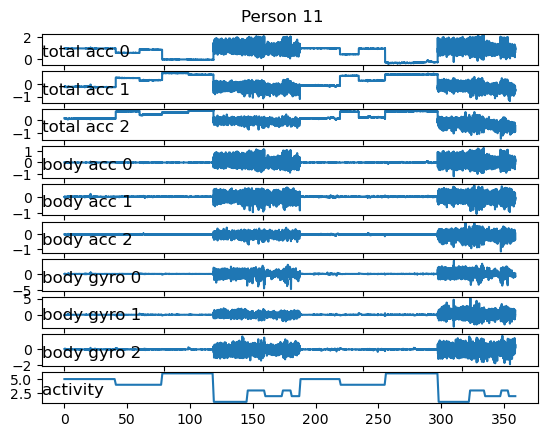

In [53]:
# load data
trainX, trainy = load_dataset('train', 'UCI HAR Dataset/')
# load mapping of rows to subjects
sub_map = load_file('UCI HAR Dataset/train/subject_train.txt')
train_subjects = unique(sub_map)
print(train_subjects)
# get the data for one subject
person = random.randint(0, len(train_subjects))
sub_id = train_subjects[person]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
print(subX.shape, suby.shape)
# plot data for subject
plot_subject(subX, suby, person)

We see a lot of movement for activites 1, 2, 3 (the walking activities) and a lot less movement for activities 4, 5, and 6 (sitting, standing, and laying). There are a lot of flat lines which correspond to activities 4, 5, and 6. 

(383, 128, 9) (383, 1)


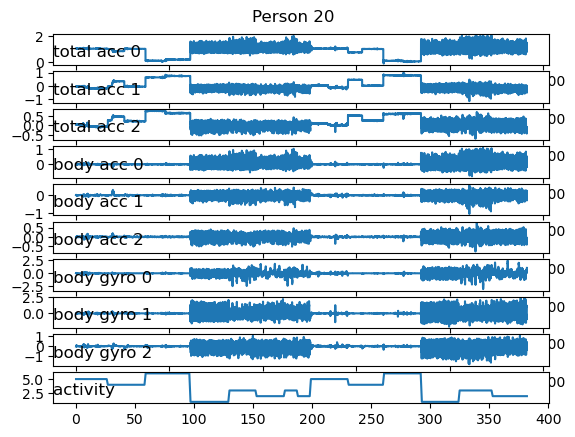

In [54]:
# get the data for one subject
person2 = random.randint(0, len(train_subjects))
if person2 == person:
    person2 = random.randint(0, len(train_subjects))
sub_id = train_subjects[person2]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
print(subX.shape, suby.shape)
# plot data for subject
plot_subject(subX, suby, person2)

About the dataset: 

"The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain."

"The features selected for this database come from the accelerometer and gyroscope 3-axial raw signals tAcc-XYZ and tGyro-XYZ. These time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz. Then they were filtered using a median filter and a 3rd order low pass Butterworth filter with a corner frequency of 20 Hz to remove noise. Similarly, the acceleration signal was then separated into body and gravity acceleration signals (tBodyAcc-XYZ and tGravityAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz. 

Subsequently, the body linear acceleration and angular velocity were derived in time to obtain Jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ). Also the magnitude of these three-dimensional signals were calculated using the Euclidean norm (tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag). 

Finally a Fast Fourier Transform (FFT) was applied to some of these signals producing fBodyAcc-XYZ, fBodyAccJerk-XYZ, fBodyGyro-XYZ, fBodyAccJerkMag, fBodyGyroMag, fBodyGyroJerkMag. (Note the 'f' to indicate frequency domain signals). 

These signals were used to estimate variables of the feature vector for each pattern:  
'-XYZ' is used to denote 3-axial signals in the X, Y and Z directions."

*Note for writing about bias
Read Datasheets for data sets
Model carts for model reporting

age exclusion - doesn't work well for everyone